<h1> IBM Data Science Capstone</h1>

<i>This Jupyter Notebook contains the <b>Neighborhood Capstone Project Part 2</b> for the IBM Data Science Course 9. </i>

<h2>INTRODUCTION</h2>
In <a href="https://github.com/mojalica/Coursera_Capstone/blob/master/Course-9-Neighborhood-Capstone-Project-Part-1.ipynb">Part 1</a> of this project, the initial problem was defined and data sources were provided.  

<b>Problem:</b> Where is the ideal location for a new up-and-coming fitness center in Arlington, VA?   
<b>Raw Data: </b>Scraped from https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Arlington_County,_Virginia and FourSquare API.  

## DATA: ARLINGTON, VA NEIGHBORHOODS 
The Arlington neighborhood data was extracted from the list on https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Arlington_County,_Virginia using BeautifulSoup. 

### Data Scraping

In [1]:
import requests
URL = requests.get('https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Arlington_County,_Virginia').text

#Importing the 'BeautifulSoup' library
from bs4 import BeautifulSoup

#Designating webpage's html code as 'soup'
soup = BeautifulSoup(URL,'lxml')

In [2]:
#Calls upon specific list in the webpage
ArlingtonList = soup.find('ul')

for ul in ArlingtonList:
    newsoup = BeautifulSoup(str(ul), 'html.parser')
    lis = newsoup.find_all('li')
    for li in lis:
        print(li.text)

Alcova Heights
Arlington Forest
Arlington Heights
Arlington Ridge
Arlington View / Johnson's Hill
Ashton Heights
Aurora Hills
Ballston
Barcroft
Bellevue Forest
Bluemont
Bonair
Boulevard Manor
Brandon Village
Buckingham
Carlin Springs
Cherrydale
Claremont
Clarendon
Columbia Forest
Columbia Heights
Country Club Hills
Crescent Hills
Crystal City
Crystal Gateway
Dominion Hills
Donaldson Run
Douglas Park
East Falls Church
Fairlington
Forest Glen
Forest Hills
Fort Myer Heights
Glencarlyn
Garden City
Gates of Ballston
Greenbrier
High View Park / Halls Hill
Jackson Court
Lacey Forest
Lauderdale
Lee Heights
Lyon Park
Madison Manor
Maywood
New Dover
Nauck (Green Valley A.K.A. The Valley)
Old Glebe
Over Lee Knolls
Penrose
Pentagon City
Prospect House
Randolph Square
Rivercrest
Rosslyn
Shirlington Crest
Station Square
Tara
Waycroft-Woodlawn
Waverly Hills
Westmont
Westover
Willet Heights
Williamsburg
Williamsburg Village
Yorktown


### Data Scrubbing and Processing
I checked the integrity of the data by:
1. Comparing Wikipedia's neighborhood names to Google Maps neighborhood names and used the latter. 
2. Making sure the neighborhoods were in Arlington County and not somewhere else in Virginia.

I discarded the neighborhood if it was: 
1. Not recognized by Google (Error: Not found)
2. Mistaken as an apartment complex  
3. Mistaken as a road
4. Mistaken as park

Then, I used Google Maps to get the coordinates of each neighborhood. 

I formatted the longitute coordinates to read "-77.XXXX" instead of the original format as "77.XXXX°W".  

Afterward, I transformed the data into a pandas dataframe that contained the names and coordinates of Arlington's 51 neighborhoods.

In [3]:
import pandas as pd

neighborhood_df = pd.DataFrame( data = {

'Neighborhood' : ['Alcova Heights', 'Arlington Forest', 'Arlington Heights', 'Arlington Ridge', "Arlington View / Johnson's Hill", 'Ashton Heights', 'Aurora Hills', 'Ballston', 'Bellevue Forest', 'Bluemont', 'Boulevard Manor', 'Brandon Village', 'Buckingham', 'Cherrydale', 'Claremont', 'Clarendon', 'Columbia Forest', 'Columbia Heights', 'Country Club Hills', 'Crescent Hills', 'Crystal City', 'Dominion Hills', 'Donaldson Run', 'Douglas Park', 'East Falls Church', 'Fairlington', 'Forest Glen', 'Fort Myer Heights', 'Glencarlyn', 'High View Park / Halls Hill', 'Lacey Forest', 'Lyon Park', 'Madison Manor', 'Maywood', 'New Dover', 'Nauck (Green Valley A.K.A. The Valley)', 'Old Glebe', 'Over Lee Knolls', 'Penrose', 'Pentagon City', 'Randolph Square', 'Rivercrest', 'Rosslyn', 'Tara', 'Waycroft-Woodlawn', 'Waverly Hills', 'Westmont', 'Westover', 'Williamsburg', 'Williamsburg Village', 'Yorktown'],
'Latitude' : [38.8646, 38.868, 38.8676, 38.8519, 38.8628, 38.8749, 38.8515, 38.8858, 38.9165, 38.8775, 38.8699, 38.8757, 38.8734, 38.8953, 38.8484, 38.8859, 38.8519, 38.8576, 38.914, 38.9048, 38.8554, 38.8759, 38.9062, 38.8543, 38.8916, 38.8351, 38.8587, 38.8914, 38.8638, 38.8941, 38.8829, 38.8807, 38.8804, 38.8974, 38.9075, 38.8479, 38.9217, 38.8866, 38.8678, 38.8606, 38.841, 38.9226, 38.894, 38.8905, 38.8863, 38.8962, 38.8626, 38.8845, 38.9004, 38.9051, 38.8993],
'Longitude' : [-77.0996, -77.1183, -77.0924, -77.0665, -77.0723, -77.0996, -77.0641, -77.1054, -77.1154, -77.1226, -77.1356, -77.1158, -77.1066, -77.1097, -77.1039, -77.0969, -77.1126, -77.1211, -77.1308, -77.1458, -77.0521, -77.1411, -77.1154, -77.0996, -77.1571, -77.0928, -77.1219, -77.0752, -77.1269, -77.1277, -77.1291, -77.0903, -77.1472, -77.1003, -77.1039, -77.0881, -77.1334, -77.1471, -77.0823, -77.0597, -77.09, -77.119, -77.0752, -77.1356, -77.1212, -77.1183, -77.0919, -77.1422, -77.1557, -77.155, -77.1341]})
    
neighborhood_df.head()              


,Latitude,Longitude,Neighborhood
0,38.8646,-77.0996,Alcova Heights
1,38.8680,-77.1183,Arlington Forest
2,38.8676,-77.0924,Arlington Heights
3,38.8519,-77.0665,Arlington Ridge
4,38.8628,-77.0723,Arlington View / Johnson's Hill


In [4]:
neighborhood_df.shape

(51, 3)

Next, I imported libraries to complete the task.

In [5]:
import numpy as np # library to handle data in a vectorized manner

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    certifi-2018.8.24          |        py35_1001         139 KB  conda-forge
    openssl-1.0.2r             |       h14c3975_0         3.1 MB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.49-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

   

Then, I define an instance of the geocoder for Arlington, VA in the USA...

In [6]:
address = 'Arlington, Virginia' 

geolocator = Nominatim(user_agent="va_long_lat")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Arlington, VA are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Arlington, VA are 38.8903961, -77.0841585.


... and created a map of all of the neighborhoods in Arlington, VA for funsies. 

In [36]:
# create map of Arlington using latitude and longitude values
map_arlington = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(neighborhood_df['Latitude'], neighborhood_df['Longitude'], neighborhood_df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_arlington)  
    
map_arlington

In the next step, I define my FourSquare credentials and pulled data from the FourSquare API to explore venues in Arlington's various neighborhoods.

In [8]:
#Define Foursquare Credentials and Version
CLIENT_ID = '40MJ1SO4QAKBDDYWERBA1J0UQX1F0VIKG5C10LKDEEGN42OD' # your Foursquare ID
CLIENT_SECRET = 'T24RCSCEXRFNRI2FOH5YABRE5WB0H0QTAKWCS5RSQ1BNWFQC' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: 40MJ1SO4QAKBDDYWERBA1J0UQX1F0VIKG5C10LKDEEGN42OD
CLIENT_SECRET:T24RCSCEXRFNRI2FOH5YABRE5WB0H0QTAKWCS5RSQ1BNWFQC


In [9]:
#Evaluate venues in Arlington
neighborhood_df.loc[0, 'Neighborhood']

neighborhood_latitude = neighborhood_df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = neighborhood_df.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = neighborhood_df.loc[0, 'Neighborhood'] # neighborhood name

print("Latitude and longitude values of {} (Arlington's first neighborhood in ABC order) are {}, {}.".format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Alcova Heights (Arlington's first neighborhood in ABC order) are 38.8646, -77.0996.


I am curious about the top 100 venues in a half-mile (~800 meter) radius. The example below is for Alcova Heights, which include the venue's name, type, latitude and longitude: 

In [10]:
LIMIT = 100
radius = 800
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

results = requests.get(url).json()

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,CycleBar,Cycle Studio,38.860825,-77.093112
1,The Broiler,American Restaurant,38.860738,-77.094114
2,Sugar Shack Donuts & Coffee,Donut Shop,38.860719,-77.092100
3,Pan American Bakery,Bakery,38.859228,-77.100808
4,Thomas Jefferson Community Center & Theatre,School,38.869751,-77.095811


Then I repeated the same process for all the neighborhoods in Arlington.

In [11]:
def getNearbyVenues(names, latitudes, longitudes, radius=800):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [12]:
#List neighborhoods in Arlington
arlington_venues = getNearbyVenues(names=neighborhood_df['Neighborhood'],
                                   latitudes=neighborhood_df['Latitude'],
                                   longitudes=neighborhood_df['Longitude']
                                  )

Alcova Heights
Arlington Forest
Arlington Heights
Arlington Ridge
Arlington View / Johnson's Hill
Ashton Heights
Aurora Hills
Ballston
Bellevue Forest
Bluemont
Boulevard Manor
Brandon Village
Buckingham
Cherrydale
Claremont
Clarendon
Columbia Forest
Columbia Heights
Country Club Hills
Crescent Hills
Crystal City
Dominion Hills
Donaldson Run
Douglas Park
East Falls Church
Fairlington
Forest Glen
Fort Myer Heights
Glencarlyn
High View Park / Halls Hill
Lacey Forest
Lyon Park
Madison Manor
Maywood
New Dover
Nauck (Green Valley A.K.A. The Valley)
Old Glebe
Over Lee Knolls
Penrose
Pentagon City
Randolph Square
Rivercrest
Rosslyn
Tara
Waycroft-Woodlawn
Waverly Hills
Westmont
Westover
Williamsburg
Williamsburg Village
Yorktown


In [13]:
#View resulting dataframe
arlington_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Alcova Heights,38.8646,-77.0996,CycleBar,38.860825,-77.093112,Cycle Studio
1,Alcova Heights,38.8646,-77.0996,The Broiler,38.860738,-77.094114,American Restaurant
2,Alcova Heights,38.8646,-77.0996,Sugar Shack Donuts & Coffee,38.860719,-77.092100,Donut Shop
3,Alcova Heights,38.8646,-77.0996,Pan American Bakery,38.859228,-77.100808,Bakery
4,Alcova Heights,38.8646,-77.0996,Thomas Jefferson Community Center & Theatre,38.869751,-77.095811,School
5,Alcova Heights,38.8646,-77.0996,Mom's Pizza,38.861997,-77.091642,Greek Restaurant
6,Alcova Heights,38.8646,-77.0996,Takohachi,38.861905,-77.091607,Japanese Restaurant
7,Alcova Heights,38.8646,-77.0996,Evolveall,38.859011,-77.101901,Athletics & Sports
8,Alcova Heights,38.8646,-77.0996,Dunkin',38.871356,-77.102164,Donut Shop
9,Alcova Heights,38.8646,-77.0996,Chipotle Mexican Grill,38.860952,-77.092255,Mexican Restaurant


## METHODOLOGY
The next step is to evaluate the neighborhoods. I originally wanted to know:  

1. Which neighborhoods have the highest number of fitness venues or fitness-related venues?
2. How many of each venue category are in each neighborhood?


### Analyze Neighborhoods

#### Question 1: Which neighborhoods have the highest number of fitness venues?

To answer this question, first I determinded the unique values in the venue categories columns.

In [14]:
venue_list = arlington_venues['Venue Category'].unique().tolist()
venue_list = sorted(venue_list)
venue_list

['ATM',
 'Afghan Restaurant',
 'African Restaurant',
 'Airport Lounge',
 'Airport Terminal',
 'American Restaurant',
 'Art Gallery',
 'Arts & Crafts Store',
 'Asian Restaurant',
 'Athletics & Sports',
 'Auditorium',
 'Australian Restaurant',
 'Auto Garage',
 'Auto Workshop',
 'Automotive Shop',
 'BBQ Joint',
 'Bagel Shop',
 'Bakery',
 'Bank',
 'Bar',
 'Baseball Field',
 'Basketball Court',
 'Beer Garden',
 'Beer Store',
 'Big Box Store',
 'Bike Rental / Bike Share',
 'Bistro',
 'Boat or Ferry',
 'Bookstore',
 'Boutique',
 'Boxing Gym',
 'Breakfast Spot',
 'Brewery',
 'Bubble Tea Shop',
 'Building',
 'Burger Joint',
 'Bus Station',
 'Cafeteria',
 'Café',
 'Cajun / Creole Restaurant',
 'Caribbean Restaurant',
 'Cheese Shop',
 'Chinese Restaurant',
 'Chiropractor',
 'Chocolate Shop',
 'Climbing Gym',
 'Clothing Store',
 'Cocktail Bar',
 'Coffee Shop',
 'College Gym',
 'Community Center',
 'Construction & Landscaping',
 'Convenience Store',
 'Cosmetics Shop',
 'Cycle Studio',
 'Dance Studi

Then I dropped all venue categories in the original arlington venues dataframe except the above mentioned venue categories. 

In [15]:
#original code
arlington_venues_fitness_1 = arlington_venues.set_index('Venue Category')
arlington_venues_fitness_2 = arlington_venues_fitness_1.drop(['ATM', 'Afghan Restaurant', 'African Restaurant', 'Airport Lounge', 'Airport Terminal', 'American Restaurant', 'Art Gallery', 'Arts & Crafts Store', 'Asian Restaurant', 'Athletics & Sports', 'Auditorium', 'Australian Restaurant', 'Auto Garage', 'Auto Workshop', 'Automotive Shop', 'BBQ Joint', 'Bagel Shop', 'Bakery', 'Bank', 'Bar', 'Beach', 'Beer Garden', 'Beer Store', 'Big Box Store', 'Bistro', 'Boat or Ferry', 'Bookstore', 'Boutique', 'Breakfast Spot', 'Brewery', 'Bubble Tea Shop', 'Building', 'Burger Joint', 'Bus Station', 'Cafeteria', 'Café', 'Cajun / Creole Restaurant', 'Caribbean Restaurant', 'Cheese Shop', 'Chinese Restaurant', 'Chocolate Shop', 'Clothing Store', 'Cocktail Bar', 'Coffee Shop', 'Construction & Landscaping', 'Convenience Store', 'Cosmetics Shop', 'Deli / Bodega', 'Department Store', 'Dessert Shop', 'Diner', 'Dog Run', 'Donut Shop', 'Drugstore', 'Dive Bar', 'Dry Cleaner', 'Dumpling Restaurant', 'Eastern European Restaurant', 'Electronics Store', 'Ethiopian Restaurant', 'Fast Food Restaurant', 'Filipino Restaurant', 'Flower Shop', 'Fondue Restaurant', 'Food', 'Food Court', 'Food Truck', 'French Restaurant', 'Fried Chicken Joint', 'Furniture / Home Store', 'Garden Center', 'Gas Station', 'Gastropub', 'Gay Bar', 'Gift Shop', 'Government Building', 'Greek Restaurant', 'Grocery Store', 'Hawaiian Restaurant', 'Health & Beauty Service', 'Historic Site', 'Home Service', 'Hospital', 'Hot Dog Joint', 'Hotel', 'Hotel Bar', 'Hotel Pool', 'Hunan Restaurant', 'Ice Cream Shop', 'Indian Restaurant', 'Indoor Play Area', 'Intersection', 'Irish Pub', 'Italian Restaurant', 'Japanese Restaurant', 'Jewelry Store', 'Juice Bar', 'Korean Restaurant', 'Lake', 'Latin American Restaurant', 'Laundry Service', 'Lawyer', 'Lingerie Store', 'Liquor Store', 'Lounge', 'Market', 'Mattress Store', 'Medical Center', 'Mediterranean Restaurant', "Men's Store", 'Metro Station', 'Mexican Restaurant', 'Middle Eastern Restaurant', 'Mini Golf', 'Miscellaneous Shop', 'Mobile Phone Shop', 'Monument / Landmark', 'Movie Theater', 'Music Store', 'Nail Salon', 'New American Restaurant', 'Nightclub', 'Noodle House', 'Optical Shop', 'Other Repair Shop', 'Pakistani Restaurant', 'Paper / Office Supplies Store', 'Persian Restaurant', 'Peruvian Restaurant', 'Pet Service', 'Pet Store', 'Pharmacy', 'Photography Studio', 'Pie Shop', 'Piercing Parlor', 'Pizza Place', 'Playground', 'Plaza', 'Poke Place', 'Portuguese Restaurant', 'Print Shop', 'Ramen Restaurant', 'Record Shop', 'Recreation Center', 'Rental Car Location', 'Residential Building (Apartment / Condo)', 'Restaurant', 'Russian Restaurant', 'Salad Place', 'Salon / Barbershop', 'Sandwich Place', 'Scenic Lookout', 'School', 'Sculpture Garden', 'Seafood Restaurant', 'Shipping Store', 'Shoe Store', 'Shopping Mall', 'Smoke Shop', 'Snack Place', 'South American Restaurant', 'Southern / Soul Food Restaurant', 'Spanish Restaurant', 'Sports Bar', 'Steakhouse', 'Supermarket', 'Sushi Restaurant', 'Szechuan Restaurant', 'Taco Place', 'Tapas Restaurant', 'Thai Restaurant', 'Theater', 'Thrift / Vintage Store', 'Vape Store', 'Vegetarian / Vegan Restaurant', 'Video Game Store', 'Video Store', 'Vietnamese Restaurant', 'Warehouse Store', 'Whisky Bar', 'Wine Bar', 'Wine Shop', 'Wings Joint', "Women's Store", 'Chiropractor', 'Farmers Market', 'Frozen Yogurt Shop', 'Massage Studio', 'Smoothie', 'Shop', 'Spa', 'Sporting Goods Shop', 'Supplement Shop'], axis=0)

#reset index for further processing
arlington_venues = arlington_venues_fitness_2.reset_index()

#reset column order
col_list = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
arlington_venues = arlington_venues[col_list]

arlington_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Alcova Heights,38.8646,-77.0996,CycleBar,38.860825,-77.093112,Cycle Studio
1,Alcova Heights,38.8646,-77.0996,Alcova Heights,38.861586,-77.101470,Basketball Court
2,Alcova Heights,38.8646,-77.0996,Alcova Heights Park,38.862301,-77.102943,Park
3,Alcova Heights,38.8646,-77.0996,6th & George Mason,38.863665,-77.105620,Park
4,Alcova Heights,38.8646,-77.0996,Arlington Hall West Park,38.866337,-77.107040,Park


I noticed that there were entries for "Gym" and "Gym / Fitness", so I merged the Venue Categories together to form one Venue Category.

In [21]:
arlington_venues['Venue Category'].replace('Gym', 'Gym / Fitness Center', inplace=True)
arlington_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Alcova Heights,38.8646,-77.0996,CycleBar,38.860825,-77.093112,Cycle Studio
1,Alcova Heights,38.8646,-77.0996,Alcova Heights,38.861586,-77.101470,Basketball Court
2,Alcova Heights,38.8646,-77.0996,Alcova Heights Park,38.862301,-77.102943,Park
3,Alcova Heights,38.8646,-77.0996,6th & George Mason,38.863665,-77.105620,Park
4,Alcova Heights,38.8646,-77.0996,Arlington Hall West Park,38.866337,-77.107040,Park


I looked at how many venues there are in each neighborhood, sorted from greatest to least.

In [59]:
arlington_venues_final = arlington_venues.groupby('Neighborhood').count().sort_values(['Venue'], ascending=False)

arlington_venues_final=arlington_venues_final.reset_index() 



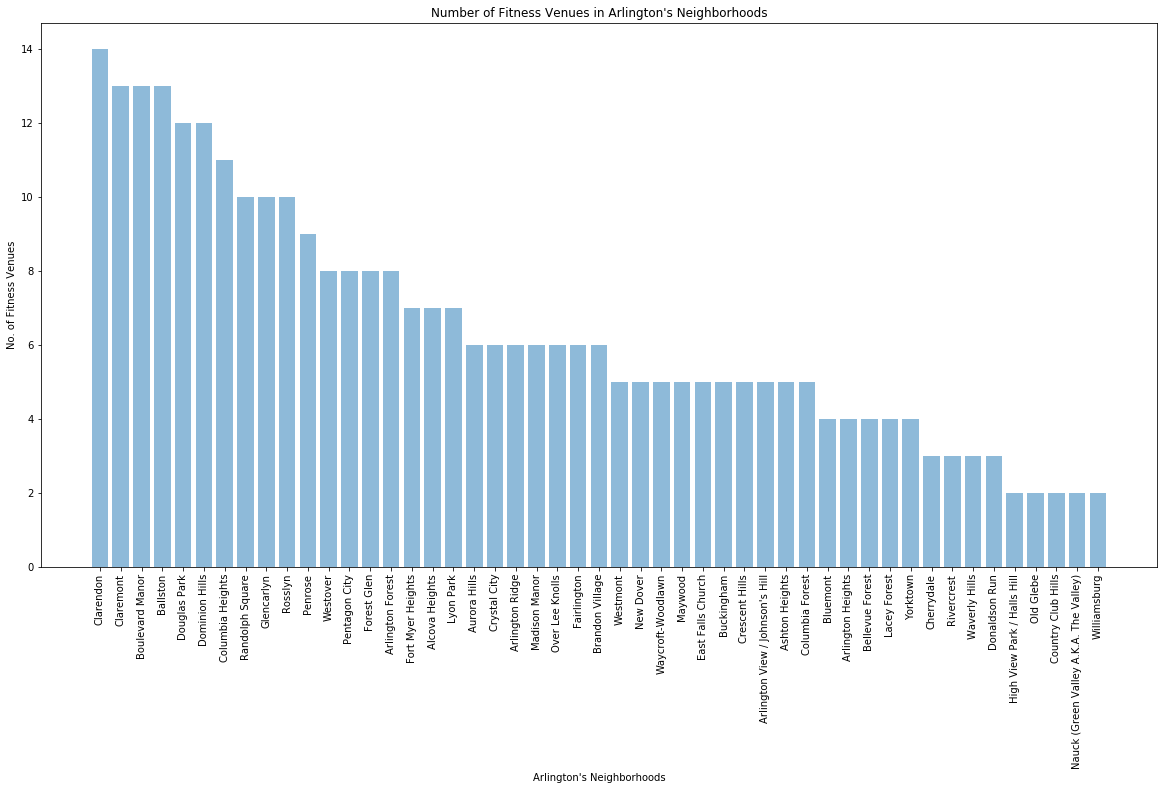

In [68]:
import matplotlib as mpl
import matplotlib.pyplot as plt

neighborhoods = arlington_venues_final.iloc[:,0]
y_pos = np.arange(len(neighborhoods))
n_count = arlington_venues_final.iloc[:,1]

plt.figure(figsize=(20,10))

plt.bar(y_pos, n_count, align='center', alpha=0.5)
plt.xticks(y_pos, neighborhoods)
plt.xlabel("Arlington's Neighborhoods")
plt.ylabel('No. of Fitness Venues')
plt.xticks(rotation=90)
plt.title("Number of Fitness Venues in Arlington's Neighborhoods")

plt.show()


#### Answer #1: Which neighborhood has the highest number of fitness venues?

Clarendon (14) followed closely by Boulevard Manor, Claremont, Ballston, and Douglas Park are the Arlington neighborhoods with the top number of fitness venues. 

This is interesting because high-density areas (according to Wikipedia) are Rosslyn, Courthouse, Ballston, Pentagon City, and Crystal City. I assumed that more than one 'high density' area would have had the highest number of fitness venues.



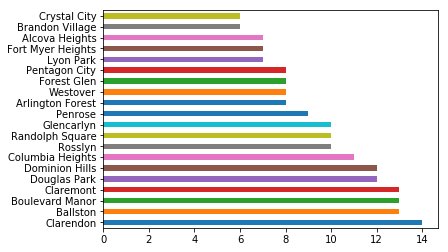

In [67]:
#arlington_venues_2 = arlington_venues.groupby('Venue Category')['Neighborhood'].nunique()
#arlington_venues_2

arlington_venues['Neighborhood'].value_counts()[:20].plot(kind='barh')

### Clustering

Furthur analysis ensues...

I clustered the venue categories based on a similiar attribute, and then examined each cluster and determined the discriminating venue categories that distinguish each cluster. 

In [31]:
# one hot encoding
arlington_onehot = pd.get_dummies(arlington_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
arlington_onehot['Neighborhood'] = arlington_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [arlington_onehot.columns[-1]] + list(arlington_onehot.columns[:-1])
arlington_onehot = arlington_onehot[fixed_columns]
arlington_onehot.head()

,Neighborhood,Baseball Field,Basketball Court,Bike Rental / Bike Share,Boxing Gym,Climbing Gym,College Gym,Community Center,Cycle Studio,Dance Studio,Disc Golf,Golf Course,Gourmet Shop,Gym / Fitness Center,Gym Pool,Martial Arts Dojo,Park,Pilates Studio,Pool,Skate Park,Skating Rink,Smoothie Shop,Soccer Field,Tennis Court,Track,Trail,Yoga Studio
0,Alcova Heights,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Alcova Heights,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Alcova Heights,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Alcova Heights,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Alcova Heights,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [329]:
#for col in arlington_onehot.columns: 
    #print(col) 

In [330]:
#arlington_onehot = arlington_onehot.drop(['ATM'], axis=1) 
#arlington_onehot = arlington_onehot.drop(['ATM', 'Afghan Restaurant', 'African Restaurant', 'Airport Lounge', 'Airport Terminal', 'American Restaurant', 'Art Gallery', 'Arts & Crafts Store', 'Asian Restaurant', 'Athletics & Sports', 'Auditorium', 'Australian Restaurant', 'Auto Garage', 'Auto Workshop', 'Automotive Shop', 'BBQ Joint', 'Bagel Shop', 'Bakery', 'Bank', 'Bar', 'Beach', 'Beer Garden', 'Beer Store', 'Big Box Store', 'Bistro', 'Boat or Ferry', 'Bookstore', 'Boutique', 'Breakfast Spot', 'Brewery', 'Bubble Tea Shop', 'Building', 'Burger Joint', 'Bus Station', 'Cafeteria', 'Café', 'Cajun / Creole Restaurant', 'Caribbean Restaurant', 'Cheese Shop', 'Chinese Restaurant', 'Chocolate Shop', 'Clothing Store', 'Cocktail Bar', 'Coffee Shop', 'Construction & Landscaping', 'Convenience Store', 'Cosmetics Shop', 'Deli / Bodega', 'Department Store', 'Dessert Shop', 'Diner', 'Dive Bar', 'Donut Shop', 'Drugstore', 'Dry Cleaner', 'Dumpling Restaurant', 'Eastern European Restaurant', 'Electronics Store', 'Ethiopian Restaurant', 'Fast Food Restaurant', 'Filipino Restaurant', 'Flower Shop', 'Fondue Restaurant', 'Food', 'Food Court', 'Food Truck', 'French Restaurant', 'Fried Chicken Joint', 'Furniture / Home Store', 'Garden Center', 'Gas Station', 'Gastropub', 'Gay Bar', 'Gift Shop', 'Government Building', 'Greek Restaurant', 'Grocery Store', 'Hawaiian Restaurant', 'Health & Beauty Service', 'Historic Site', 'Home Service', 'Hospital', 'Hot Dog Joint', 'Hotel', 'Hotel Bar', 'Hotel Pool', 'Hunan Restaurant', 'Ice Cream Shop', 'Indian Restaurant', 'Indoor Play Area', 'Intersection', 'Irish Pub', 'Italian Restaurant', 'Japanese Restaurant', 'Jewelry Store', 'Korean Restaurant', 'Lake', 'Latin American Restaurant', 'Laundry Service', 'Lawyer', 'Lingerie Store', 'Liquor Store', 'Lounge', 'Market', 'Mattress Store', 'Medical Center', 'Mediterranean Restaurant', "Men's Store", 'Metro Station', 'Mexican Restaurant', 'Middle Eastern Restaurant', 'Mini Golf', 'Miscellaneous Shop', 'Mobile Phone Shop', 'Monument / Landmark', 'Movie Theater', 'Music Store', 'Nail Salon', 'New American Restaurant', 'Nightclub', 'Noodle House', 'Optical Shop', 'Other Repair Shop', 'Pakistani Restaurant', 'Paper / Office Supplies Store', 'Persian Restaurant', 'Peruvian Restaurant', 'Pet Service', 'Pet Store', 'Pharmacy', 'Photography Studio', 'Pie Shop', 'Piercing Parlor', 'Pizza Place', 'Playground', 'Plaza', 'Poke Place', 'Portuguese Restaurant', 'Print Shop', 'Ramen Restaurant', 'Record Shop', 'Recreation Center', 'Rental Car Location', 'Residential Building (Apartment / Condo)', 'Restaurant', 'Russian Restaurant', 'Salad Place', 'Salon / Barbershop', 'Sandwich Place', 'Scenic Lookout', 'School', 'Sculpture Garden', 'Seafood Restaurant', 'Shipping Store', 'Shoe Store', 'Shopping Mall', 'Smoke Shop', 'Snack Place', 'South American Restaurant', 'Southern / Soul Food Restaurant', 'Spanish Restaurant', 'Sports Bar', 'Steakhouse', 'Supermarket', 'Sushi Restaurant', 'Szechuan Restaurant', 'Taco Place', 'Tapas Restaurant', 'Thai Restaurant', 'Theater', 'Thrift / Vintage Store', 'Vape Store', 'Vegetarian / Vegan Restaurant', 'Video Game Store', 'Video Store', 'Vietnamese Restaurant', 'Warehouse Store', 'Whisky Bar', 'Wine Bar', 'Wine Shop', 'Wings Joint', "Women's Store"], axis=1)
#arlington_onehot.head()

Shape of Arlington's venue list:

In [32]:
arlington_onehot.shape

(314, 27)

I determine the mean ocurrence of each fitness venue category and then listed the top 5 venues for each neighborhood.

In [372]:
#find mean occurence
arlington_grouped = arlington_onehot.groupby('Neighborhood').mean().reset_index()
arlington_grouped.head()

#find top 5s
num_top_venues = 5

for hood in arlington_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = arlington_grouped[arlington_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Alcova Heights----
              venue  freq
0              Park  0.57
1      Soccer Field  0.14
2      Cycle Studio  0.14
3  Basketball Court  0.14
4    Baseball Field  0.00


----Arlington Forest----
              venue  freq
0             Trail  0.50
1              Park  0.38
2              Pool  0.12
3    Baseball Field  0.00
4  Basketball Court  0.00


----Arlington Heights----
                      venue  freq
0               Yoga Studio  0.25
1  Bike Rental / Bike Share  0.25
2              Soccer Field  0.25
3              Cycle Studio  0.25
4         Martial Arts Dojo  0.00


----Arlington Ridge----
                  venue  freq
0                  Park  0.50
1                 Trail  0.17
2  Gym / Fitness Center  0.17
3      Basketball Court  0.17
4        Baseball Field  0.00


----Arlington View / Johnson's Hill----
                  venue  freq
0                  Park   0.4
1  Gym / Fitness Center   0.4
2                  Pool   0.2
3        Baseball Field   0.0
4     Ma

                  venue  freq
0  Gym / Fitness Center   0.4
1                 Trail   0.2
2                  Pool   0.2
3                  Park   0.2
4        Baseball Field   0.0


----Westmont----
                  venue  freq
0           Yoga Studio   0.2
1          Tennis Court   0.2
2          Cycle Studio   0.2
3  Gym / Fitness Center   0.2
4                  Park   0.2


----Westover----
              venue  freq
0              Park  0.38
1    Baseball Field  0.25
2             Trail  0.25
3      Soccer Field  0.12
4  Basketball Court  0.00


----Williamsburg----
              venue  freq
0    Baseball Field   0.5
1      Soccer Field   0.5
2  Basketball Court   0.0
3             Trail   0.0
4             Track   0.0


----Yorktown----
            venue  freq
0    Soccer Field  0.25
1    Dance Studio  0.25
2            Pool  0.25
3            Park  0.25
4  Baseball Field  0.00




In [373]:
#Sort venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [394]:
#Create a new dataframe and show the top ten venues per neighborhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = arlington_grouped['Neighborhood']

for ind in np.arange(arlington_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(arlington_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alcova Heights,Park,Basketball Court,Soccer Field,Cycle Studio,Yoga Studio,Gourmet Shop,Bike Rental / Bike Share,Boxing Gym,Climbing Gym,College Gym
1,Arlington Forest,Trail,Park,Pool,Yoga Studio,Golf Course,Basketball Court,Bike Rental / Bike Share,Boxing Gym,Climbing Gym,College Gym
2,Arlington Heights,Yoga Studio,Bike Rental / Bike Share,Soccer Field,Cycle Studio,Gourmet Shop,Basketball Court,Boxing Gym,Climbing Gym,College Gym,Community Center
3,Arlington Ridge,Park,Gym / Fitness Center,Basketball Court,Trail,Gourmet Shop,Bike Rental / Bike Share,Boxing Gym,Climbing Gym,College Gym,Community Center
4,Arlington View / Johnson's Hill,Gym / Fitness Center,Park,Pool,Gourmet Shop,Basketball Court,Bike Rental / Bike Share,Boxing Gym,Climbing Gym,College Gym,Community Center


In [385]:
neighborhoods_venues_sorted.shape

(49, 11)

I noticed there were two neighborhoods missing from this list - down to 49 from 51. In other words, two neighborhoods had no fitness venues, which I found to be unusual.

#### Cluster Data Results
First, I found the optimum 'k' cluster value when evaluating Arlington's 49 neighborhoods using the Elbow Method method.

In [376]:
#import libraries
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

arlington_grouped_clustering = arlington_grouped.drop('Neighborhood', 1)

Sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(arlington_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

Plot k with respect to the sum of squared distances and then find the peak, which represents the optium k value.

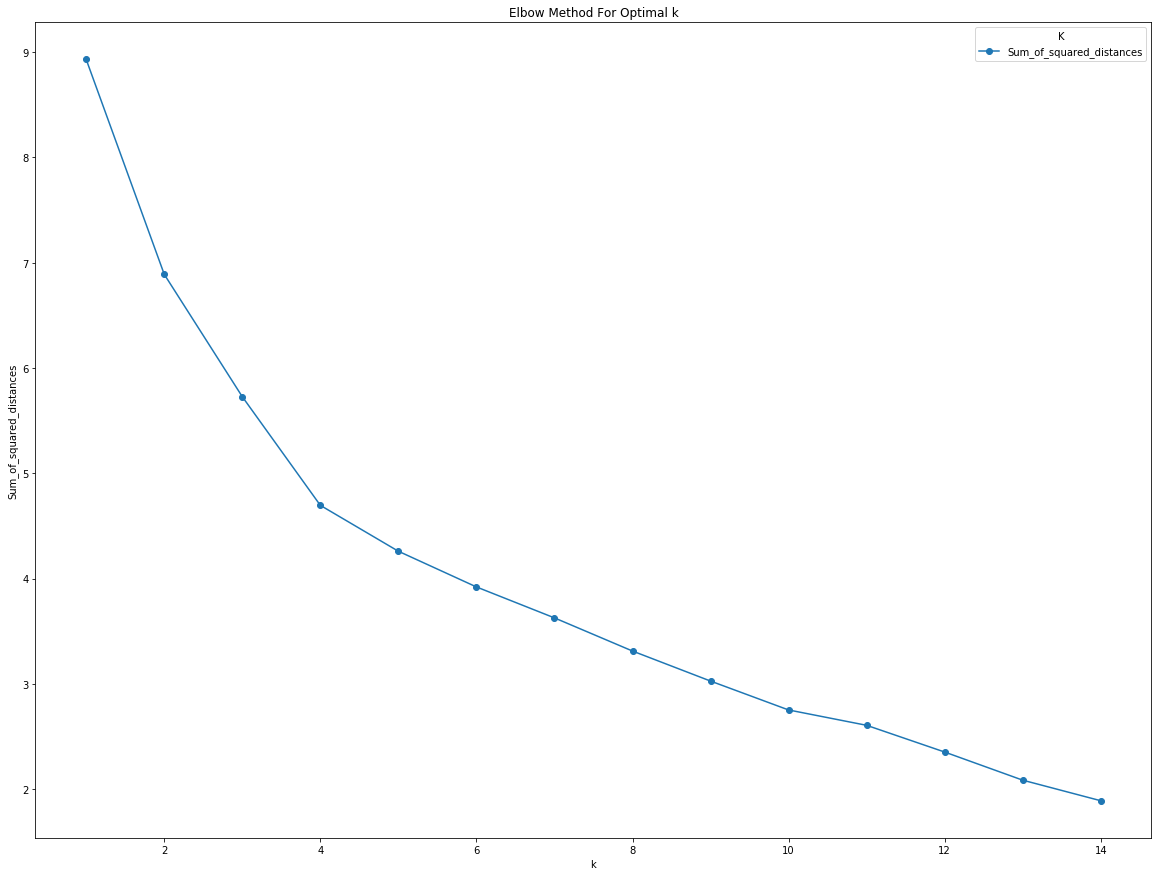

In [377]:
optimal_k= pd.DataFrame(data= Sum_of_squared_distances, columns = ['Sum_of_squared_distances'], index = K)
optimal_k.rename_axis('K', axis = 'columns', inplace = True)

optimal_k.plot(kind = 'line', figsize = (20, 15), marker = 'o')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Looking at the graph, the optimum value for k could be 11. 

Next, I ran k-means cluster for k = 11 clusters. 

In [379]:
# Run k-means to cluster the neighborhood into k = 11 clusters
kclusters = 11

arlington_grouped_clustering = arlington_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(arlington_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:15] 

array([5, 2, 6, 5, 0, 5, 5, 1, 5, 1, 1, 5, 0, 0, 4], dtype=int32)

I created a new dataframe that includes the clusters, top 10 venues for each neighborhood, and the latitude and longitude coordinates with each neighborhood.

In [395]:

#Add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

arlington_merged = neighborhood_df

#Merge scarborough_grouped with scarborough_data to add latitude/longitude for each neighborhood
arlington_merged = arlington_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

#Change 'cluster labels' from float to int
#arlingtonh_merged['Cluster Labels'] = arlington_merged['Cluster Labels'].astype(int)

arlington_merged

,Latitude,Longitude,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,38.8646,-77.0996,Alcova Heights,5.0,Park,Basketball Court,Soccer Field,Cycle Studio,Yoga Studio,Gourmet Shop,Bike Rental / Bike Share,Boxing Gym,Climbing Gym,College Gym
1,38.8680,-77.1183,Arlington Forest,2.0,Trail,Park,Pool,Yoga Studio,Golf Course,Basketball Court,Bike Rental / Bike Share,Boxing Gym,Climbing Gym,College Gym
2,38.8676,-77.0924,Arlington Heights,6.0,Yoga Studio,Bike Rental / Bike Share,Soccer Field,Cycle Studio,Gourmet Shop,Basketball Court,Boxing Gym,Climbing Gym,College Gym,Community Center
3,38.8519,-77.0665,Arlington Ridge,5.0,Park,Gym / Fitness Center,Basketball Court,Trail,Gourmet Shop,Bike Rental / Bike Share,Boxing Gym,Climbing Gym,College Gym,Community Center
4,38.8628,-77.0723,Arlington View / Johnson's Hill,0.0,Gym / Fitness Center,Park,Pool,Gourmet Shop,Basketball Court,Bike Rental / Bike Share,Boxing Gym,Climbing Gym,College Gym,Community Center
5,38.8749,-77.0996,Ashton Heights,5.0,Park,Gym / Fitness Center,Soccer Field,Gourmet Shop,Basketball Court,Bike Rental / Bike Share,Boxing Gym,Climbing Gym,College Gym,Community Center
6,38.8515,-77.0641,Aurora Hills,5.0,Park,Gym / Fitness Center,Basketball Court,Gourmet Shop,Bike Rental / Bike Share,Boxing Gym,Climbing Gym,College Gym,Community Center,Cycle Studio
7,38.8858,-77.1054,Ballston,1.0,Park,Yoga Studio,Gym / Fitness Center,Baseball Field,Boxing Gym,Pool,Track,College Gym,Disc Golf,Basketball Court
8,38.9165,-77.1154,Bellevue Forest,5.0,Park,Gym / Fitness Center,Trail,Gourmet Shop,Basketball Court,Bike Rental / Bike Share,Boxing Gym,Climbing Gym,College Gym,Community Center
9,38.8775,-77.1226,Bluemont,1.0,Park,Gym / Fitness Center,Pool,Gourmet Shop,Basketball Court,Bike Rental / Bike Share,Boxing Gym,Climbing Gym,College Gym,Community Center


I knew that 2 entries had missing values (venues), so I'm removing them from the list.

In [396]:
#Remove rows with NaN entries
arlington_merged_drop = arlington_merged.dropna()
arlington_merged = arlington_merged_drop.reset_index() 

#Change 'Cluster Labels' from float to int
arlington_merged['Cluster Labels'] = arlington_merged['Cluster Labels'].astype(int)

arlington_merged

,index,Latitude,Longitude,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,38.8646,-77.0996,Alcova Heights,5,Park,Basketball Court,Soccer Field,Cycle Studio,Yoga Studio,Gourmet Shop,Bike Rental / Bike Share,Boxing Gym,Climbing Gym,College Gym
1,1,38.8680,-77.1183,Arlington Forest,2,Trail,Park,Pool,Yoga Studio,Golf Course,Basketball Court,Bike Rental / Bike Share,Boxing Gym,Climbing Gym,College Gym
2,2,38.8676,-77.0924,Arlington Heights,6,Yoga Studio,Bike Rental / Bike Share,Soccer Field,Cycle Studio,Gourmet Shop,Basketball Court,Boxing Gym,Climbing Gym,College Gym,Community Center
3,3,38.8519,-77.0665,Arlington Ridge,5,Park,Gym / Fitness Center,Basketball Court,Trail,Gourmet Shop,Bike Rental / Bike Share,Boxing Gym,Climbing Gym,College Gym,Community Center
4,4,38.8628,-77.0723,Arlington View / Johnson's Hill,0,Gym / Fitness Center,Park,Pool,Gourmet Shop,Basketball Court,Bike Rental / Bike Share,Boxing Gym,Climbing Gym,College Gym,Community Center
5,5,38.8749,-77.0996,Ashton Heights,5,Park,Gym / Fitness Center,Soccer Field,Gourmet Shop,Basketball Court,Bike Rental / Bike Share,Boxing Gym,Climbing Gym,College Gym,Community Center
6,6,38.8515,-77.0641,Aurora Hills,5,Park,Gym / Fitness Center,Basketball Court,Gourmet Shop,Bike Rental / Bike Share,Boxing Gym,Climbing Gym,College Gym,Community Center,Cycle Studio
7,7,38.8858,-77.1054,Ballston,1,Park,Yoga Studio,Gym / Fitness Center,Baseball Field,Boxing Gym,Pool,Track,College Gym,Disc Golf,Basketball Court
8,8,38.9165,-77.1154,Bellevue Forest,5,Park,Gym / Fitness Center,Trail,Gourmet Shop,Basketball Court,Bike Rental / Bike Share,Boxing Gym,Climbing Gym,College Gym,Community Center
9,9,38.8775,-77.1226,Bluemont,1,Park,Gym / Fitness Center,Pool,Gourmet Shop,Basketball Court,Bike Rental / Bike Share,Boxing Gym,Climbing Gym,College Gym,Community Center


In [397]:
#Visualize clusters
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(arlington_merged['Latitude'], arlington_merged['Longitude'], arlington_merged['Neighborhood'], arlington_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Next I examined the eleven clusters.
    
**Cluster 1**

In [402]:
#Cluster 1
arlington_merged.loc[arlington_merged['Cluster Labels'] == 0, arlington_merged.columns[[0] + list(range(1, arlington_merged.shape[1]))]].sort_values(by = ['Neighborhood'], ascending = True)


,index,Latitude,Longitude,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,4,38.8628,-77.0723,Arlington View / Johnson's Hill,0,Gym / Fitness Center,Park,Pool,Gourmet Shop,Basketball Court,Bike Rental / Bike Share,Boxing Gym,Climbing Gym,College Gym,Community Center
12,12,38.8734,-77.1066,Buckingham,0,Gym / Fitness Center,Park,Skating Rink,Gourmet Shop,Basketball Court,Bike Rental / Bike Share,Boxing Gym,Climbing Gym,College Gym,Community Center
13,13,38.8953,-77.1097,Cherrydale,0,Yoga Studio,Park,Gym / Fitness Center,Tennis Court,Golf Course,Basketball Court,Bike Rental / Bike Share,Boxing Gym,Climbing Gym,College Gym
15,15,38.8859,-77.0969,Clarendon,0,Gym / Fitness Center,Park,Yoga Studio,Bike Rental / Bike Share,Boxing Gym,Cycle Studio,Tennis Court,Golf Course,Basketball Court,Climbing Gym
20,20,38.8554,-77.0521,Crystal City,0,Gym / Fitness Center,Park,Climbing Gym,Yoga Studio,Soccer Field,Smoothie Shop,Basketball Court,Bike Rental / Bike Share,Boxing Gym,Track
25,25,38.8351,-77.0928,Fairlington,0,Gym / Fitness Center,Smoothie Shop,Pilates Studio,Park,Golf Course,Basketball Court,Bike Rental / Bike Share,Boxing Gym,Climbing Gym,College Gym
27,27,38.8914,-77.0752,Fort Myer Heights,0,Gym / Fitness Center,Park,Gourmet Shop,Yoga Studio,Soccer Field,Smoothie Shop,Basketball Court,Bike Rental / Bike Share,Boxing Gym,Climbing Gym
31,31,38.8807,-77.0903,Lyon Park,0,Gym / Fitness Center,Park,Cycle Studio,Yoga Studio,Soccer Field,Smoothie Shop,Basketball Court,Bike Rental / Bike Share,Boxing Gym,Climbing Gym
33,33,38.8974,-77.1003,Maywood,0,Gym / Fitness Center,Park,Bike Rental / Bike Share,Yoga Studio,Soccer Field,Smoothie Shop,Basketball Court,Track,Boxing Gym,Climbing Gym
38,38,38.8678,-77.0823,Penrose,0,Gym / Fitness Center,Park,Pool,Yoga Studio,Soccer Field,Smoothie Shop,Basketball Court,Bike Rental / Bike Share,Boxing Gym,Climbing Gym


In [403]:
#Cluster 2
arlington_merged.loc[arlington_merged['Cluster Labels'] == 1, arlington_merged.columns[[0] + list(range(1, arlington_merged.shape[1]))]].sort_values(by = ['Neighborhood'], ascending = True)

,index,Latitude,Longitude,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,7,38.8858,-77.1054,Ballston,1,Park,Yoga Studio,Gym / Fitness Center,Baseball Field,Boxing Gym,Pool,Track,College Gym,Disc Golf,Basketball Court
9,9,38.8775,-77.1226,Bluemont,1,Park,Gym / Fitness Center,Pool,Gourmet Shop,Basketball Court,Bike Rental / Bike Share,Boxing Gym,Climbing Gym,College Gym,Community Center
10,10,38.8699,-77.1356,Boulevard Manor,1,Trail,Soccer Field,Park,Pool,Gym / Fitness Center,Skate Park,Disc Golf,Baseball Field,Skating Rink,Pilates Studio
19,19,38.9048,-77.1458,Crescent Hills,1,Pool,Park,Soccer Field,Yoga Studio,Golf Course,Basketball Court,Bike Rental / Bike Share,Boxing Gym,Climbing Gym,College Gym
21,21,38.8759,-77.1411,Dominion Hills,1,Park,Baseball Field,Pool,Soccer Field,Skate Park,Trail,Disc Golf,Basketball Court,Bike Rental / Bike Share,Boxing Gym
22,22,38.9062,-77.1154,Donaldson Run,1,Pool,Park,Trail,Yoga Studio,Golf Course,Basketball Court,Bike Rental / Bike Share,Boxing Gym,Climbing Gym,College Gym
34,34,38.9075,-77.1039,New Dover,1,Park,Pool,Trail,Yoga Studio,Golf Course,Basketball Court,Bike Rental / Bike Share,Boxing Gym,Climbing Gym,College Gym
48,50,38.8993,-77.1341,Yorktown,1,Soccer Field,Pool,Park,Dance Studio,Yoga Studio,Golf Course,Basketball Court,Bike Rental / Bike Share,Boxing Gym,Climbing Gym


In [404]:
#Cluster 3
arlington_merged.loc[arlington_merged['Cluster Labels'] == 2, arlington_merged.columns[[0] + list(range(1, arlington_merged.shape[1]))]].sort_values(by = ['Neighborhood'], ascending = True)

,index,Latitude,Longitude,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,1,38.8680,-77.1183,Arlington Forest,2,Trail,Park,Pool,Yoga Studio,Golf Course,Basketball Court,Bike Rental / Bike Share,Boxing Gym,Climbing Gym,College Gym
17,17,38.8576,-77.1211,Columbia Heights,2,Trail,Gym / Fitness Center,Park,Community Center,Martial Arts Dojo,Yoga Studio,Skating Rink,Skate Park,Basketball Court,Bike Rental / Bike Share
26,26,38.8587,-77.1219,Forest Glen,2,Trail,Park,Gym / Fitness Center,Community Center,Gourmet Shop,Basketball Court,Bike Rental / Bike Share,Boxing Gym,Climbing Gym,College Gym
28,28,38.8638,-77.1269,Glencarlyn,2,Trail,Community Center,Park,Disc Golf,Yoga Studio,Gourmet Shop,Basketball Court,Bike Rental / Bike Share,Boxing Gym,Climbing Gym
37,37,38.8866,-77.1471,Over Lee Knolls,2,Trail,Park,Pool,Yoga Studio,Golf Course,Basketball Court,Bike Rental / Bike Share,Boxing Gym,Climbing Gym,College Gym


In [405]:
#Cluster 4
arlington_merged.loc[arlington_merged['Cluster Labels'] == 3, arlington_merged.columns[[0] + list(range(1, arlington_merged.shape[1]))]].sort_values(by = ['Neighborhood'], ascending = True)

,index,Latitude,Longitude,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
36,36,38.9217,-77.1334,Old Glebe,3,Baseball Field,Park,Gourmet Shop,Basketball Court,Bike Rental / Bike Share,Boxing Gym,Climbing Gym,College Gym,Community Center,Cycle Studio
46,47,38.8845,-77.1422,Westover,3,Park,Baseball Field,Trail,Soccer Field,Golf Course,Basketball Court,Bike Rental / Bike Share,Boxing Gym,Climbing Gym,College Gym


In [406]:
#Cluster 5
arlington_merged.loc[arlington_merged['Cluster Labels'] == 4, arlington_merged.columns[[0] + list(range(1, arlington_merged.shape[1]))]].sort_values(by = ['Neighborhood'], ascending = True)

,index,Latitude,Longitude,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,14,38.8484,-77.1039,Claremont,4,Gym / Fitness Center,Baseball Field,Trail,Soccer Field,Pool,Park,Tennis Court,Track,Dance Studio,Basketball Court
16,16,38.8519,-77.1126,Columbia Forest,4,Baseball Field,Pool,Trail,Gym / Fitness Center,Soccer Field,Smoothie Shop,Basketball Court,Bike Rental / Bike Share,Boxing Gym,Climbing Gym
23,23,38.8543,-77.0996,Douglas Park,4,Gym / Fitness Center,Baseball Field,Trail,Soccer Field,Park,Gym Pool,Tennis Court,Track,Dance Studio,Basketball Court
24,24,38.8916,-77.1571,East Falls Church,4,Trail,Gym / Fitness Center,Soccer Field,Baseball Field,Tennis Court,Smoothie Shop,Basketball Court,Bike Rental / Bike Share,Boxing Gym,Climbing Gym
30,30,38.8829,-77.1291,Lacey Forest,4,Baseball Field,Trail,Gym / Fitness Center,Tennis Court,Golf Course,Basketball Court,Bike Rental / Bike Share,Boxing Gym,Climbing Gym,College Gym
40,40,38.8410,-77.0900,Randolph Square,4,Gym / Fitness Center,Trail,Park,Smoothie Shop,Pilates Studio,Baseball Field,Tennis Court,Skating Rink,Dance Studio,Basketball Court


In [407]:
#Cluster 6
arlington_merged.loc[arlington_merged['Cluster Labels'] == 5, arlington_merged.columns[[0] + list(range(1, arlington_merged.shape[1]))]].sort_values(by = ['Neighborhood'], ascending = True)

,index,Latitude,Longitude,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,38.8646,-77.0996,Alcova Heights,5,Park,Basketball Court,Soccer Field,Cycle Studio,Yoga Studio,Gourmet Shop,Bike Rental / Bike Share,Boxing Gym,Climbing Gym,College Gym
3,3,38.8519,-77.0665,Arlington Ridge,5,Park,Gym / Fitness Center,Basketball Court,Trail,Gourmet Shop,Bike Rental / Bike Share,Boxing Gym,Climbing Gym,College Gym,Community Center
5,5,38.8749,-77.0996,Ashton Heights,5,Park,Gym / Fitness Center,Soccer Field,Gourmet Shop,Basketball Court,Bike Rental / Bike Share,Boxing Gym,Climbing Gym,College Gym,Community Center
6,6,38.8515,-77.0641,Aurora Hills,5,Park,Gym / Fitness Center,Basketball Court,Gourmet Shop,Bike Rental / Bike Share,Boxing Gym,Climbing Gym,College Gym,Community Center,Cycle Studio
8,8,38.9165,-77.1154,Bellevue Forest,5,Park,Gym / Fitness Center,Trail,Gourmet Shop,Basketball Court,Bike Rental / Bike Share,Boxing Gym,Climbing Gym,College Gym,Community Center
11,11,38.8757,-77.1158,Brandon Village,5,Park,Gym / Fitness Center,Skating Rink,Gourmet Shop,Basketball Court,Bike Rental / Bike Share,Boxing Gym,Climbing Gym,College Gym,Community Center
32,32,38.8804,-77.1472,Madison Manor,5,Park,Trail,Basketball Court,Yoga Studio,Gourmet Shop,Bike Rental / Bike Share,Boxing Gym,Climbing Gym,College Gym,Community Center
41,41,38.9226,-77.1190,Rivercrest,5,Park,Gym / Fitness Center,Gourmet Shop,Basketball Court,Bike Rental / Bike Share,Boxing Gym,Climbing Gym,College Gym,Community Center,Cycle Studio


In [408]:
#Cluster 7
arlington_merged.loc[arlington_merged['Cluster Labels'] == 6, arlington_merged.columns[[0] + list(range(1, arlington_merged.shape[1]))]].sort_values(by = ['Neighborhood'], ascending = True)

,index,Latitude,Longitude,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,2,38.8676,-77.0924,Arlington Heights,6,Yoga Studio,Bike Rental / Bike Share,Soccer Field,Cycle Studio,Gourmet Shop,Basketball Court,Boxing Gym,Climbing Gym,College Gym,Community Center


In [409]:
#Cluster 8
arlington_merged.loc[arlington_merged['Cluster Labels'] == 7, arlington_merged.columns[[0] + list(range(1, arlington_merged.shape[1]))]].sort_values(by = ['Neighborhood'], ascending = True)

,index,Latitude,Longitude,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,18,38.914,-77.1308,Country Club Hills,7,Baseball Field,Golf Course,Trail,Basketball Court,Bike Rental / Bike Share,Boxing Gym,Climbing Gym,College Gym,Community Center,Cycle Studio


In [410]:
#Cluster 9
arlington_merged.loc[arlington_merged['Cluster Labels'] == 8, arlington_merged.columns[[0] + list(range(1, arlington_merged.shape[1]))]].sort_values(by = ['Neighborhood'], ascending = True)

,index,Latitude,Longitude,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
47,48,38.9004,-77.1557,Williamsburg,8,Baseball Field,Soccer Field,Gourmet Shop,Basketball Court,Bike Rental / Bike Share,Boxing Gym,Climbing Gym,College Gym,Community Center,Cycle Studio


In [411]:
#Cluster 10
arlington_merged.loc[arlington_merged['Cluster Labels'] == 9, arlington_merged.columns[[0] + list(range(1, arlington_merged.shape[1]))]].sort_values(by = ['Neighborhood'], ascending = True)

,index,Latitude,Longitude,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,29,38.8941,-77.1277,High View Park / Halls Hill,9,Gym / Fitness Center,Dance Studio,Trail,Basketball Court,Bike Rental / Bike Share,Boxing Gym,Climbing Gym,College Gym,Community Center,Cycle Studio
44,45,38.8962,-77.1183,Waverly Hills,9,Gym / Fitness Center,Dance Studio,Park,Gourmet Shop,Basketball Court,Bike Rental / Bike Share,Boxing Gym,Climbing Gym,College Gym,Community Center


In [412]:
#Cluster 11
arlington_merged.loc[arlington_merged['Cluster Labels'] == 10, arlington_merged.columns[[0] + list(range(1, arlington_merged.shape[1]))]].sort_values(by = ['Neighborhood'], ascending = True)

,index,Latitude,Longitude,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
35,35,38.8479,-77.0881,Nauck (Green Valley A.K.A. The Valley),10,Smoothie Shop,Trail,Yoga Studio,Gourmet Shop,Basketball Court,Bike Rental / Bike Share,Boxing Gym,Climbing Gym,College Gym,Community Center


# RESULTS


# CONCLUSION

# RECOMMENDATIONS

For a slightly different analysis, I would have added the sportswear shops, supplement shops, massage shops, etc to the mix. This is so that when I do my analysis clustering, I could see if there is a particular neighborhood that doesn't rank high in fitness venues but has wellness shops that may attract gym-goers to the area.

If I were to dive a little deeper into this analysis of Arlington's neighborhoods, I'd be interested to see how age and income levels affect the ideal gym location. After all, it seems like mostly 20- and some 30-something-year-olds dominate the gym floor and I am targeting middle class citizens with my membership pricing, so I want to the fitness venues to be in a neighboorhood where many middle-class 20s and 30s live. 

#### Question 2: How many of each venue type are in each neighborhood?

During this analysis, I wanted to know: 
1. Which neighborhoods have the highest number of fitness venues?   
2. Which neighborhoods have the best ranking fitness venues?  
3. How many of each venue are in each neighborhood?   

#### Question 3: How many of each venue are in each neighborhood?